c:\Users\joaom\AppData\Local\Continuum\anaconda3\envs\pfe\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\joaom\AppData\Local\Temp\ipykernel_26452\3215522679.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


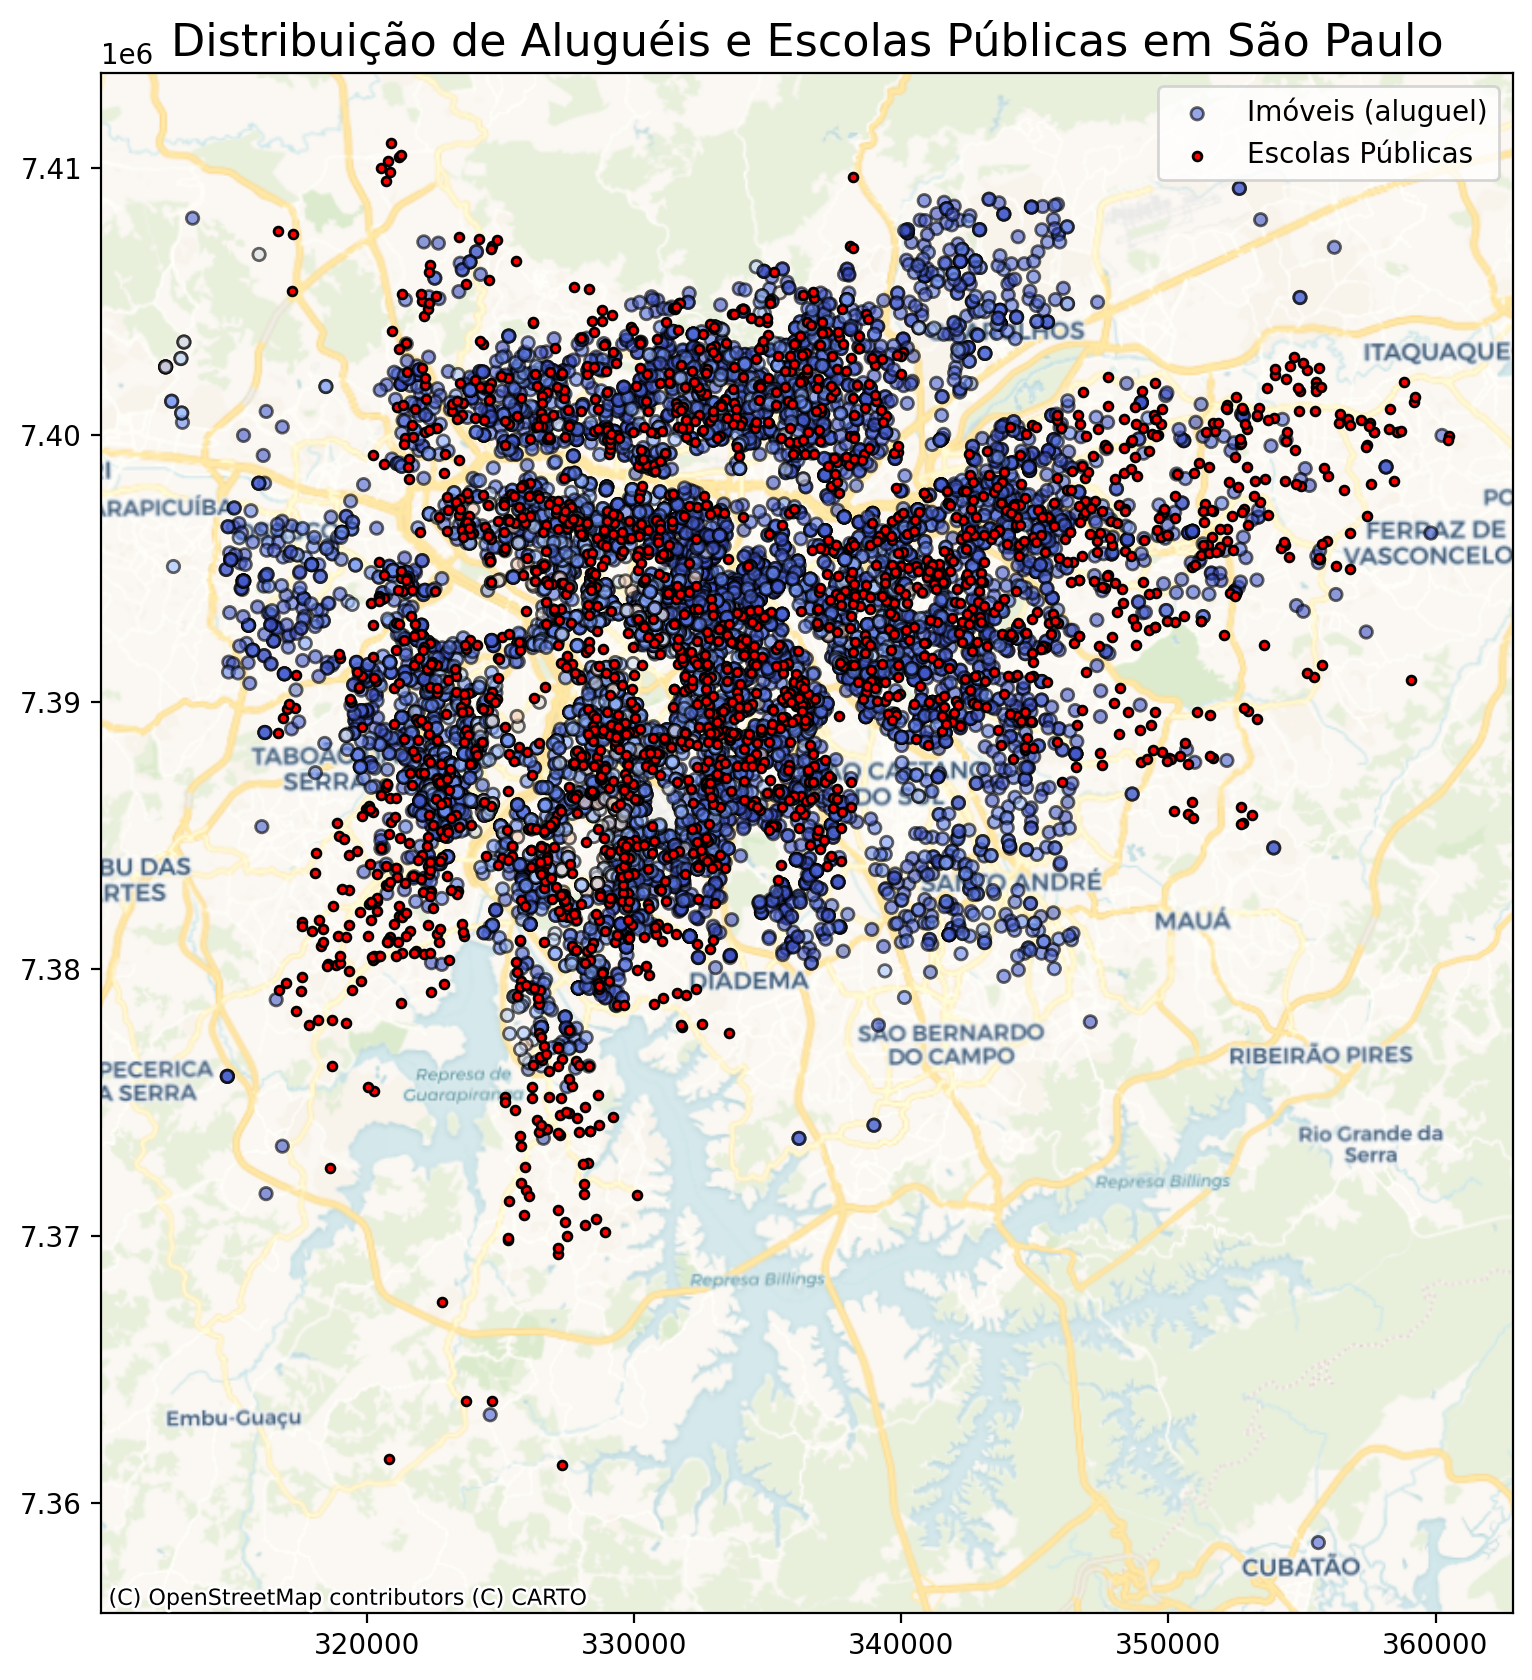

In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Carregar os dados dos imóveis
housing_data = pd.read_csv('data/filtered_addresses_sao_paulo.csv')

# Criar a geometria dos imóveis a partir das coordenadas de latitude e longitude
geometry = [Point(xy) for xy in zip(housing_data['longitude'], housing_data['latitude'])]
geo_housing_data = gpd.GeoDataFrame(housing_data, geometry=geometry, crs="EPSG:4326")

# Carregar o limite do município de São Paulo
municipios_sp = gpd.read_file('data/sao_paulo_boundaries/SIRGAS_limites_municipais.shp')
sp = municipios_sp.query('municipio == "SÃO PAULO"')

# Definir o CRS original de sp para SIRGAS 2000 e reprojetar para EPSG:31983
sp.set_crs("EPSG:4674", inplace=True)
sp = sp.to_crs(epsg=31983)

# Reprojetar o GeoDataFrame dos imóveis para EPSG:31983
geo_housing_data = geo_housing_data.to_crs(epsg=31983)

# Carregar o shapefile de escolas públicas e reprojetar para EPSG:31983
ensino_publico = gpd.read_file('data/education/SIRGAS_SHP_TEMA_EDUCACAO_REDE_PRIVADA.shp')
ensino_publico = ensino_publico.set_crs("EPSG:31983", allow_override=True, inplace=True)

# Plotar o limite de São Paulo, os imóveis e as escolas em um só gráfico
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o limite do município de São Paulo
sp.plot(ax=ax, color='white', edgecolor='black', alpha=0.6, label="Limite de São Paulo")

# Plotar os pontos dos imóveis
geo_housing_data.plot(
    ax=ax,
    column='rent',  # Coluna com o valor do aluguel
    cmap='coolwarm',  # Mapa de cores para representar o valor do aluguel
    markersize=20,
    alpha=0.6,
    edgecolor='black',
    label="Imóveis (aluguel)"
)

# Plotar as escolas públicas
ensino_publico.plot(
    ax=ax,
    color='red',  # Cor para diferenciar as escolas
    markersize=10,
    edgecolor='black',
    label="Escolas Públicas"
)

# Adicionar o mapa base
ctx.add_basemap(ax, crs="EPSG:31983", source=ctx.providers.CartoDB.Voyager)

# Ajustes finais no gráfico
plt.title("Distribuição de Aluguéis e Escolas Públicas em São Paulo", fontsize=16)
plt.legend()
plt.show()
